In [5]:
import sys, subprocess
print("Using:", sys.executable)
subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "pip", "setuptools", "wheel"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "datasets"])
import datasets; print("datasets version:", datasets.__version__)


Using: /Users/jessicahong/nlp_env/bin/python
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0━━━━━━━━━━━━━━━━━━ 1/2 [setuptools]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [setuptools]2 [setuptools]
  Using cached datasets-4.0.0-py3-none-any.whl.metadata (19 kB)
  Using cached filelock-3.19.1-py3-none-any.whl.metadata (2.1 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached xxhash-3.5.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached huggingface_hub-0.34.4-py

/Users/jessicahong/nlp_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


datasets version: 4.0.0


In [6]:
import sys
!{sys.executable} -m pip -V
!{sys.executable} -m pip show datasets


pip 25.2 from /Users/jessicahong/nlp_env/lib/python3.11/site-packages/pip (python 3.11)
Name: datasets
Version: 4.0.0
Summary: HuggingFace community-driven open-source library of datasets
Home-page: https://github.com/huggingface/datasets
Author: HuggingFace Inc.
Author-email: thomas@huggingface.co
License: Apache 2.0
Location: /Users/jessicahong/nlp_env/lib/python3.11/site-packages
Requires: dill, filelock, fsspec, huggingface-hub, multiprocess, numpy, packaging, pandas, pyarrow, pyyaml, requests, tqdm, xxhash
Required-by: 


In [7]:
!{sys.executable} -m pip install datasets

In [8]:
import sys
!{sys.executable} -m pip install scikit-learn transformers

  Using cached scipy-1.16.1-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.4-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.7 kB)
  Using cached safetensors-0.6.2-cp38-abi3-macosx_11_0_arm64.whl.metadata (4.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 32.6 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 23.2 MB/s  0:00:00eta 0:00:01
Using cached tokenizers-0.21.4-cp39-abi3-macosx_11_0_arm64.whl (2.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached safetensors-0.6.2-cp38-abi3-macosx_11_0_arm64.whl (432 kB)
Using cached scipy-1.16.1-cp311-cp311-macosx_14_0_arm64.whl (20.9 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [transformers] [transformers]


In [14]:
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import numpy as np

In [15]:
ds = load_dataset("PolyAI/banking77")

Using the latest cached version of the dataset since PolyAI/banking77 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /Users/jessicahong/.cache/huggingface/datasets/PolyAI___banking77/default/1.1.0/17ffc2ed47c2ed928bee64127ff1dbc97204cb974c2f980becae7c864007aed9 (last modified on Thu Aug 21 22:46:11 2025).


In [16]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 10003
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 3080
    })
})


In [17]:
X = list(ds["train"]["text"])      # Column → list
y = np.array(ds["train"]["label"]) # Column → np.array

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
len(X_train), len(X_test), len(set(y))

(8002, 2001, 77)

In [20]:
#TF-IDF + Logistic Regression

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np

In [22]:
#Vectorizer(word 1–2gram)

In [23]:
vec = TfidfVectorizer(
    ngram_range=(1, 2), # - Use 1-gram and 2-gram features
    min_df=2, # - Ignore words that appear fewer than 2 times
    max_features=100_000, # - Keep only the top 100,000 features
    lowercase=True,
    # stop_words="english"
)

In [27]:
# === 2. Fit + transform the training data ===

In [24]:
Xtr = vec.fit_transform(X_train)  # - fit: learn the vocabulary and IDF values from the training set
Xte = vec.transform(X_test)    # - transform: convert the training text into TF-IDF vectors

In [26]:
Xtr = vec.fit_transform(X_train) # Result: Xtr is a sparse matrix (numeric representation of the text)

In [28]:
# === 3. Transform the test data ===

In [29]:
Xte = vec.transform(X_test)

In [30]:
# === 4. Define the classifier = logistic Regression ===

In [31]:
# - max_iter=2000: increase iterations to ensure convergence
# - n_jobs=-1: use all CPU cores for faster training
clf = LogisticRegression(max_iter=2000, n_jobs=-1)

In [32]:
# === 5. Train the model ===

In [38]:
clf.fit(Xtr, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [39]:
# Matrix

In [44]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    top_k_accuracy_score
)
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# === 1) Predict on the test set ===
pred = clf.predict(Xte)

In [46]:
# === 2) Core metrics ===
print("Accuracy:", accuracy_score(y_test, pred))
print("Macro-F1:", f1_score(y_test, pred, average="macro"))
print("Weighted-F1:", f1_score(y_test, pred, average="weighted"))
print("Micro-F1:", f1_score(y_test, pred, average="micro"))

Accuracy: 0.8435782108945528
Macro-F1: 0.8324787057447385
Weighted-F1: 0.8423075081121811
Micro-F1: 0.8435782108945528


In [47]:
# === 3) Precision & Recall ===
print("Precision (macro):", precision_score(y_test, pred, average="macro"))
print("Recall (macro):", recall_score(y_test, pred, average="macro"))
print("Precision (weighted):", precision_score(y_test, pred, average="weighted"))
print("Recall (weighted):", recall_score(y_test, pred, average="weighted"))

Precision (macro): 0.8594077097474135
Recall (macro): 0.8274987899301708
Precision (weighted): 0.8533264159917618
Recall (weighted): 0.8435782108945528


In [48]:
# === 4) Detailed per-class report ===
# If you have label names from the dataset, use them for a nicer report
label_names = None
try:
    # ds should be your loaded dataset dict
    label_names = ds["train"].features["label"].names
    print("\n--- Classification Report (with label names) ---")
    print(classification_report(y_test, pred, target_names=label_names, digits=4))
except Exception:
    print("\n--- Classification Report ---")
    print(classification_report(y_test, pred, digits=4))



--- Classification Report (with label names) ---
                                                  precision    recall  f1-score   support

                                activate_my_card     1.0000    0.8438    0.9153        32
                                       age_limit     0.9545    0.9545    0.9545        22
                         apple_pay_or_google_pay     1.0000    1.0000    1.0000        25
                                     atm_support     0.8824    0.8824    0.8824        17
                                automatic_top_up     1.0000    0.8400    0.9130        25
         balance_not_updated_after_bank_transfer     0.7632    0.8529    0.8056        34
balance_not_updated_after_cheque_or_cash_deposit     0.8537    0.9722    0.9091        36
                         beneficiary_not_allowed     0.9231    0.7742    0.8421        31
                                 cancel_transfer     0.9333    0.9032    0.9180        31
                            card_about_to_expire 

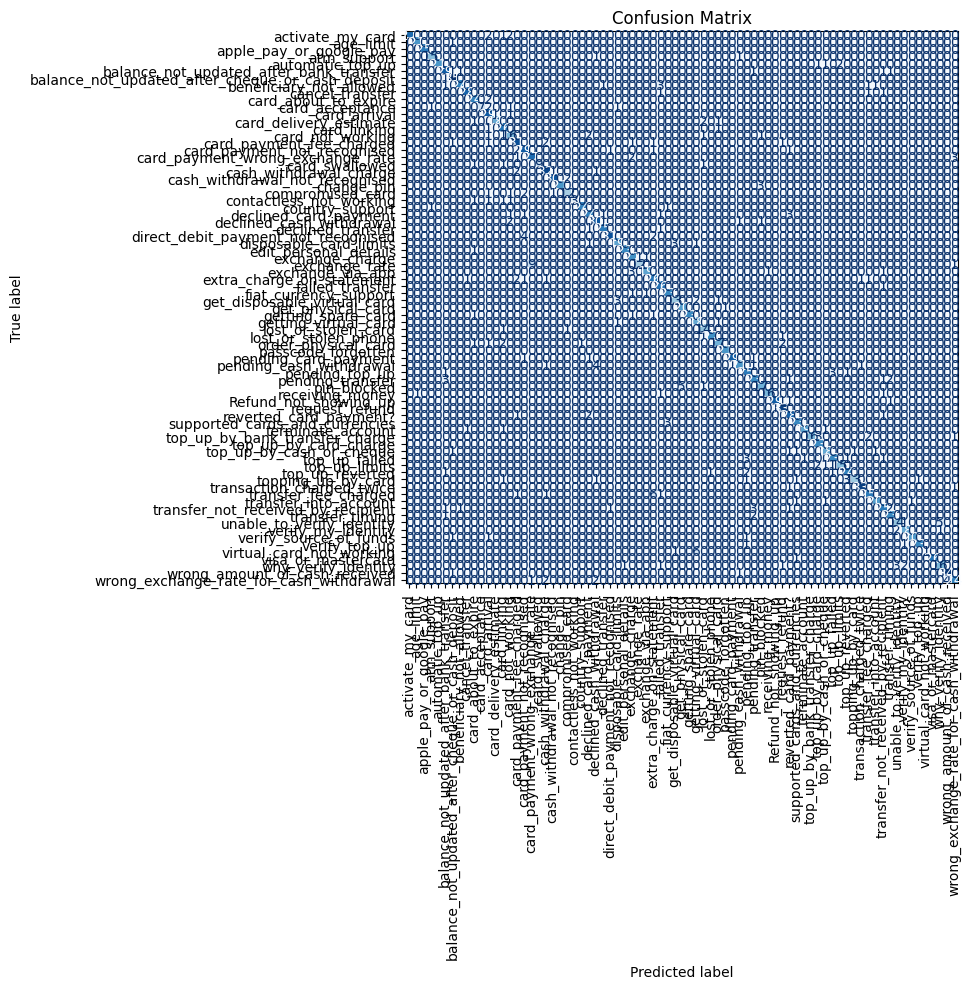

In [49]:
# === 5) Confusion Matrix (plot + save) ===
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
fig, ax = plt.subplots(figsize=(10, 10))  # adjust size if 77 classes is too dense
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues", values_format="d", colorbar=False)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.savefig("confusion_matrix.png", dpi=200)
plt.show()

In [50]:
# === 6) Top-k accuracy (only if classifier supports predict_proba) ===
if hasattr(clf, "predict_proba"):
    probas = clf.predict_proba(Xte)
    print("Top-3 Accuracy:", top_k_accuracy_score(y_test, probas, k=3))


Top-3 Accuracy: 0.953023488255872


In [51]:
# === 7) Quick 5-fold CV on the *training* set (macro-F1) ===
# Note: CV is computed on training data to estimate stability; it won't use X_test.
cv_scores = cross_val_score(clf, Xtr, y_train, cv=5, scoring="f1_macro", n_jobs=-1)
print("5-fold CV Macro-F1:", np.mean(cv_scores), "±", np.std(cv_scores))

5-fold CV Macro-F1: 0.8268015823856885 ± 0.0035757416494322826


In [52]:
# === 8) Optional: export a compact metrics summary to CSV (handy for GitHub) ===
import pandas as pd
summary = {
    "accuracy": accuracy_score(y_test, pred),
    "f1_macro": f1_score(y_test, pred, average="macro"),
    "f1_weighted": f1_score(y_test, pred, average="weighted"),
    "precision_macro": precision_score(y_test, pred, average="macro"),
    "recall_macro": recall_score(y_test, pred, average="macro"),
}
pd.DataFrame([summary]).to_csv("metrics_summary.csv", index=False)
